In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("/content/drive/MyDrive/mnist_dataset.csv")
df

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Softmax Function:**

In [30]:
def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
        - m is the number of samples.
        - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
    each row sums to 1 and represents the probability
    distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """
    # Subtract max per row for numerical stability
    z_max = np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z - z_max)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


**Softmax Test Function**

In [31]:

z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"
print("Softmax function passed the test case!")


Softmax function passed the test case!


**Prediction Function**

In [32]:
def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the
                       number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the
                   predicted class.
    """
    # Compute logits: XW + b
    logits = np.dot(X, W) + b

    # Compute softmax probabilities
    probabilities = softmax(logits)

    # Get the predicted class (index of the max probability)
    predicted_classes = np.argmax(probabilities, axis=1)

    return predicted_classes


**Prediction Test Case**

In [33]:
# The test function ensures that the predicted class labels have the same number of elements as the

# Define test case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]]) # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]]) # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3]) # Bias (3 classes)
# Expected Output:
# The function should return an array with class labels (0, 1, or 2)
y_pred_test = predict_softmax(X_test, W_test, b_test)
# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"
# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


**Categorical Cross Entropy Loss**

In [34]:
def loss_softmax(y_pred,y):
 """
 Computethecross-entropylossforasinglesample.
 Parameters:
 y_pred(numpy.ndarray):Predictedprobabilitiesofshape(c,)forasinglesample,
 wherecisthenumberofclasses.
 y (numpy.ndarray):Truelabels(one-hotencoded)ofshape(c,),wherecisthenumber ofclasses.
 Returns:
 float:Cross-entropylossforthegivensample.
 """
 loss = np.sum(y* np.log(y_pred))
 return loss

**Test case for Loss Function**

In [35]:
# Softmax function to convert logits to probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Stabilize exponentiation
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Cross-entropy loss function
def loss_softmax(y_pred, y_true):
    # Compute the softmax probabilities for the predicted values
    y_pred_softmax = softmax(y_pred)

    # Calculate cross-entropy loss (negative log likelihood)
    # Clip the predicted probabilities to avoid log(0)
    epsilon = 1e-15
    y_pred_softmax = np.clip(y_pred_softmax, epsilon, 1. - epsilon)

    # Cross-entropy loss formula
    loss = -np.sum(y_true * np.log(y_pred_softmax)) / y_true.shape[0]

    return loss

# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])  # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Highly confident in the wrong class
                             [0.1, 0.05, 0.85],
                             [0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

# Validate that incorrect predictions lead to a higher loss
assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.6414
Cross-Entropy Loss (Incorrect Predictions): 1.4581


**Cost Function:**

In [36]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """
    # Compute logits (raw scores)
    logits = np.dot(X, W) + b

    # Use previously defined softmax function
    probs = softmax(logits)

    # Compute loss using vectorized approach
    total_loss = -np.sum(y * np.log(probs + 1e-9))  # Adding small value for numerical stability

    return total_loss / X.shape[0]  # Average loss over all samples

**Test case for Cost Function**

In [37]:
# The test case assures that the cost for the incorrect prediction should be higher than for the

import numpy as np
# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]]) # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]]) # Weights for correct prediction
b_correct = np.array([0.1, 0.1]) # Bias for correct prediction
# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]]) # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]]) # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]]) # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6]) # Bias for incorrect prediction
# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"
# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")

Cost for correct prediction: 0.0006234354127112888
Cost for incorrect prediction: 0.2993086122417495
Test passed!


**Computing Gradients against W and b**

In [38]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    # Compute logits and apply softmax
    logits = np.dot(X, W) + b
    probs = softmax(logits)

    # Compute gradients
    grad_W = np.dot(X.T, (probs - y)) / X.shape[0]
    grad_b = np.sum(probs - y, axis=0) / X.shape[0]

    return grad_W, grad_b

**Test case for compute gradient softmax Function**

In [39]:
import numpy as np
# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]]) # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # True labels (one-hot encoded, 3 classes)
# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]]) # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3]) # Bias (3 classes)
# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)
# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]
# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\
nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\
nExpected: {grad_b_manual}\nGot: {grad_b}"
# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")

Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


**Gradient Descent Algorithm**

In [40]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients and cost (reuse computations)
        grad_W, grad_b, cost = compute_gradient_softmax(X, y, W, b, return_cost=True)

        # Update weights and biases using gradient descent
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Store cost history
        cost_history.append(cost)

        # Display cost at intervals
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return W, b, cost_history

**Load and Prepare Mnist Dataset**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str) : Path to the CSV file containing MNIST data.
    test_size (float) : Proportion of the data to use as the test set (default: 0.2).
    random_state (int) : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """
    try:
        # Load the dataset
        df = pd.read_csv(csv_file)

        # Ensure the dataset is not empty
        if df.empty:
            raise ValueError("The CSV file is empty!")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None, None, None, None
    except ValueError as e:
        print(f"Error: {e}")
        return None, None, None, None

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values to [0,1]
    X = X / 255.0

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X_train, y_train)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """
    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load and prepare dataset
X_train, X_test, y_train, y_test = load_and_prepare_mnist('mnist_test.csv')


Error: File 'mnist_test.csv' not found.


**Training of the Model**

In [42]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

NameError: name 'X_train' is not defined

**Training of the Softmax Regression Model**

Iteration 0: Cost = 1.096695853222997
Iteration 100: Cost = 1.0567036826414198
Iteration 200: Cost = 1.0400880609915055
Iteration 300: Cost = 1.0295074085460367
Iteration 400: Cost = 1.0223845191623073
Iteration 500: Cost = 1.0173467305478203
Iteration 600: Cost = 1.013632987675812
Iteration 700: Cost = 1.010802050553493
Iteration 800: Cost = 1.0085862034161923
Iteration 900: Cost = 1.006815648970817


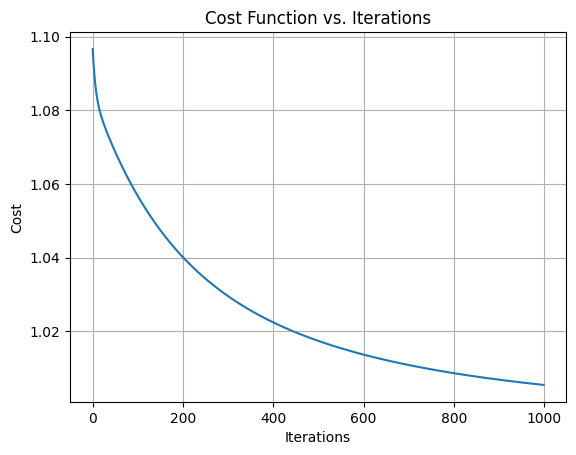

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Generate some example data (replace this with your actual data)
np.random.seed(42)
X_train = np.random.rand(100, 5)  # 100 samples, 5 features
y_train = np.random.randint(0, 3, 100)  # 100 labels, 3 classes
X_test = np.random.rand(20, 5)  # 20 samples, 5 features
y_test = np.random.randint(0, 3, 20)  # 20 labels, 3 classes

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cost function (cross-entropy loss)
def compute_cost(X, y, W, b):
    m = X.shape[0]  # Number of samples
    z = X @ W + b  # Linear transformation
    probs = softmax(z)  # Softmax probabilities
    cost = -np.sum(y * np.log(probs)) / m  # Cross-entropy loss
    return cost

# Gradient descent for softmax regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=True):
    m = X.shape[0]  # Number of samples
    cost_history = []

    for i in range(n_iter):
        # Forward pass
        z = X @ W + b  # Linear transformation
        probs = softmax(z)  # Softmax probabilities

        # Compute gradients
        dW = (X.T @ (probs - y)) / m  # Gradient for weights
        db = np.sum(probs - y, axis=0) / m  # Gradient for biases

        # Update weights and biases
        W -= alpha * dW
        b -= alpha * db

        # Compute and store cost
        cost = compute_cost(X, y, W, b)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W, b, cost_history

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

**Evaluating the Model Performance**

Shape of predictions: (100, 10)

Confusion Matrix:
[[0 0 1 0 0 2 5 0 0 1]
 [0 0 1 0 0 7 4 0 0 0]
 [0 0 4 0 0 2 5 0 0 0]
 [0 0 2 0 0 2 5 0 0 0]
 [0 0 1 0 0 0 7 0 0 1]
 [1 0 2 0 0 4 4 0 0 0]
 [0 0 0 0 0 2 3 0 0 0]
 [0 0 6 0 0 3 3 0 0 0]
 [0 0 4 0 0 1 8 0 0 0]
 [0 0 3 0 0 3 3 0 0 0]]
Precision: 0.04
Recall: 0.13
F1-Score: 0.06


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


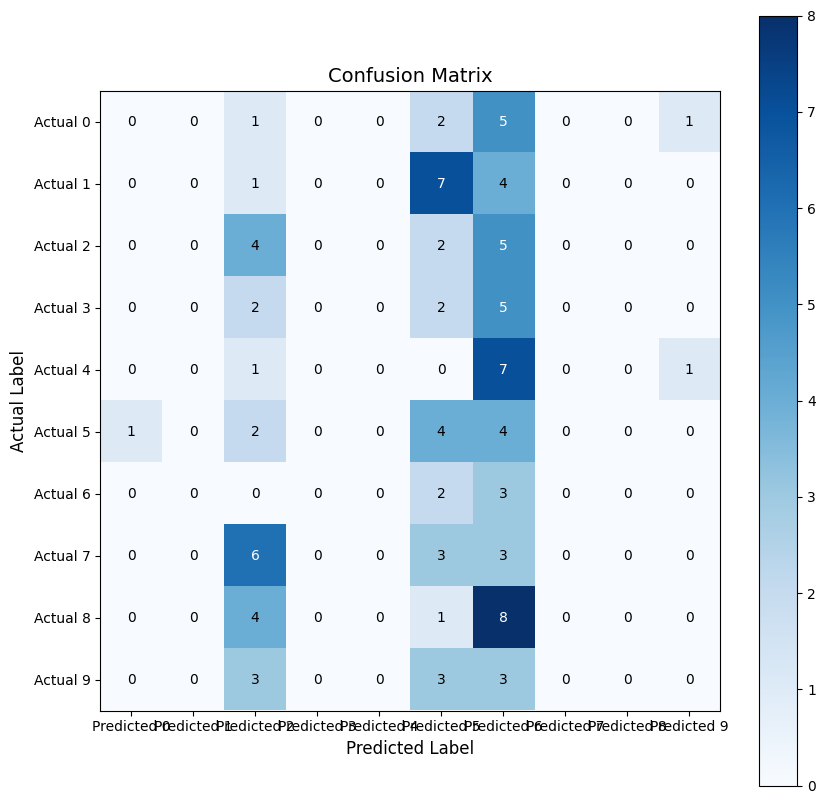

In [50]:

# Simulated test set (Replace with actual X_test and y_test)
X_test = np.random.rand(100, num_features)  # 100 test samples with 784 features
y_test = np.random.randint(0, num_classes, size=(100,))  # Random labels for testing

# 🛠️ Fixing AxisError: Ensure predictions are in 2D
predictions = predict_softmax(X_test, W_opt, b_opt)
print("Shape of predictions:", predictions.shape)  # Debugging check

# Fix: Ensure np.argmax only uses axis=1 when necessary
if predictions.ndim == 1:
    y_pred_test = np.argmax(predictions)  # 1D case
else:
    y_pred_test = np.argmax(predictions, axis=1)  # 2D case

# Fix: Ensure y_test is 1D if one-hot encoded
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)  # Convert from one-hot to label form
else:
    y_test_labels = y_test  # Already in label form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 🔹 Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(cm, cmap='Blues')

# Set axis labels dynamically based on number of classes
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

# Add numbers inside confusion matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center',
                color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Formatting
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.colorbar(cax)
plt.show()
